# Clustering de series de tiempo por escalamiento multidimensional
Por: Federico Salinas Samaniego

Carga de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcatppuccin

from sklearn.cluster import KMeans
from collections import Counter

from Rutinas_MDS import ClustTimeMDS
from Metricas_Clusters import GetMetricsClustering, group_colors, mocha_cmap

mpl.style.use("mocha")
plt.rcParams.update({
    "text.usetex": True
})

Lectura de series de tiempo y sus clases asignadas

In [2]:
time_series = []
class_series = []

with open("../input data/StarLightCurves_sample.txt", "r") as input_sample_file:
    for line in input_sample_file.readlines():
        split_line = line.split(" ")
        series_sample = [float(value) for value in split_line[1:]]

        class_series.append(int(split_line[0]))
        time_series.append(series_sample)

class_series = np.array(class_series)
time_series = np.array(time_series)

Carga de la matriz de similaridades con base en DTW

In [3]:
Similarity_matrix = np.load("../output data/DTW.npy")

In [4]:
ClustMDS = ClustTimeMDS(Similarity_matrix)

NumDims = list(range(1, 5))
VarsExplained = []
for num_dim in NumDims:
    ClustMDS.GetSolution(num_dim)
    VarsExplained.append(ClustMDS.VarExplained)

76.10434472265125 of explained variance with 1 components
85.07043269169779 of explained variance with 2 components
89.37950087449538 of explained variance with 3 components
91.20580452116961 of explained variance with 4 components


Text(0, 0.5, '\\% de varianza explicada')

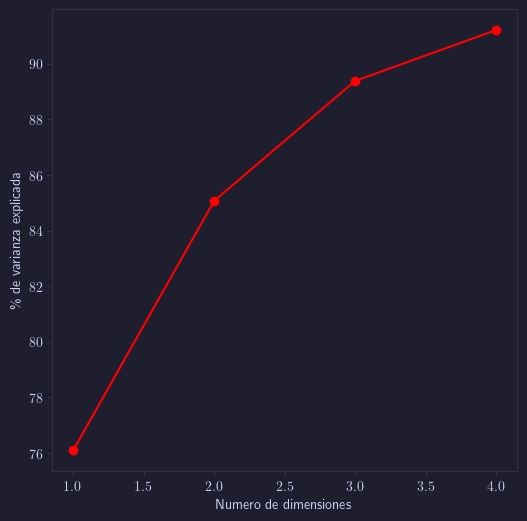

In [5]:
Figure_Vars = plt.figure(1, figsize = (6,6))
Subplot_Vars = Figure_Vars.add_subplot(111)

Subplot_Vars.plot(NumDims, VarsExplained, "-or")
Subplot_Vars.set_xlabel("Numero de dimensiones")
Subplot_Vars.set_ylabel(r"\% de varianza explicada")

In [6]:
ClustMDS.GetSolution(num_dim = 3)
Xc = ClustMDS.Xc

89.37950087449538 of explained variance with 3 components


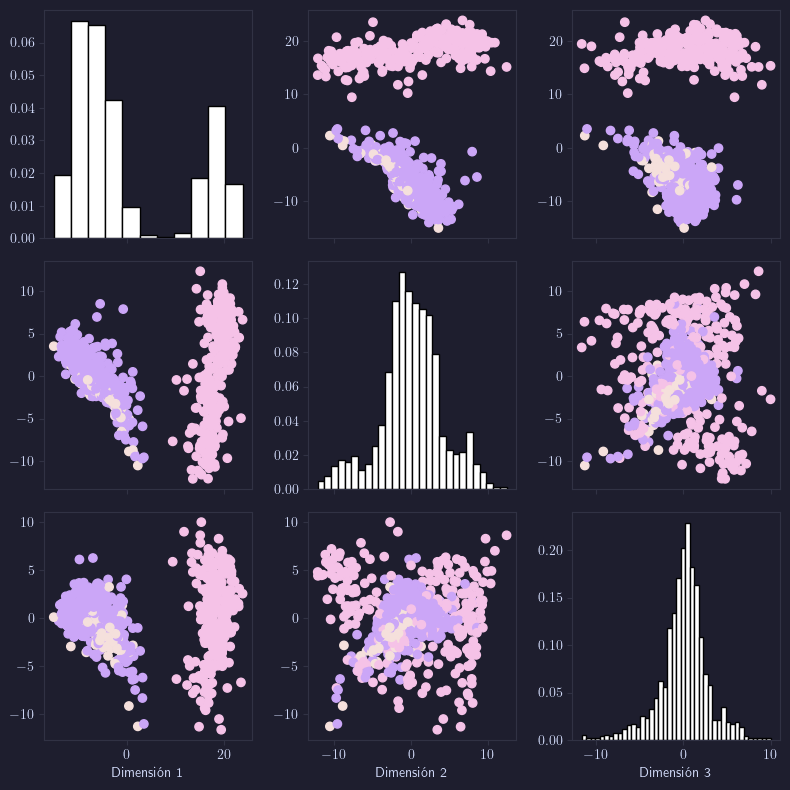

In [7]:
Figure_MDS1, Subplots_MDS1 = plt.subplots(nrows = 3, ncols = 3, sharex = "col", figsize = (8, 8))

group_colors_used = set()

for n in range(3):
    Subplots_MDS1[n,n].hist(Xc[:,n], facecolor = "white", edgecolor = "black", density = True, bins = "auto")
    for m in range(3):
        if n != m:
            scatter_MDS1 = Subplots_MDS1[n,m].scatter(Xc[:,m], Xc[:,n], c = class_series, cmap = mocha_cmap)
    Subplots_MDS1[2,n].set_xlabel(f"Dimensión {n + 1}")

Figure_MDS1.tight_layout()

In [8]:
SVD_Kmeans = KMeans(n_clusters = 3)
AssignedClusters = SVD_Kmeans.fit_predict(Xc)

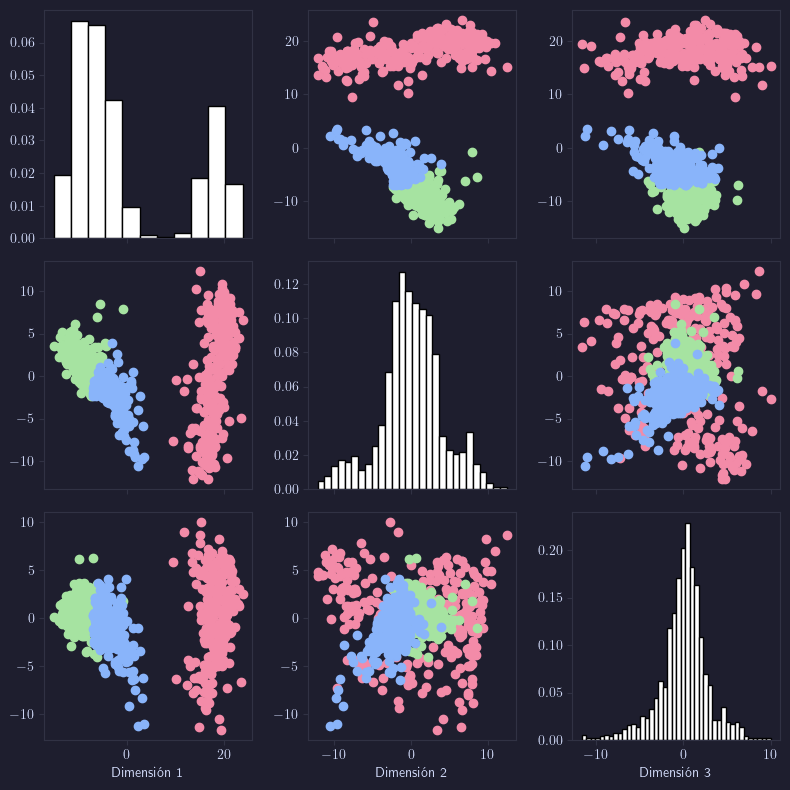

In [9]:
Figure_MDS2, Subplots_MDS2 = plt.subplots(nrows = 3, ncols = 3, sharex = "col", figsize = (8, 8))

for n in range(3):
    Subplots_MDS2[n,n].hist(Xc[:,n], facecolor = "white", edgecolor = "black", density = True, bins = "auto")
    for m in range(3):
        if n != m:
            for class_num in set(AssignedClusters):
                class_num_mask = (AssignedClusters == class_num)
                Subplots_MDS2[n,m].scatter(Xc[class_num_mask,m], Xc[class_num_mask,n], c = group_colors[class_num + 1])
    Subplots_MDS2[2,n].set_xlabel(f"Dimensión {n + 1}")

Figure_MDS2.tight_layout()

In [10]:
cluster_counts = {k:Counter(class_series[AssignedClusters == k]) for k in range(3)}
cluster_counts

{0: Counter({2: 275}),
 1: Counter({3: 386, 1: 54}),
 2: Counter({3: 187, 1: 98})}

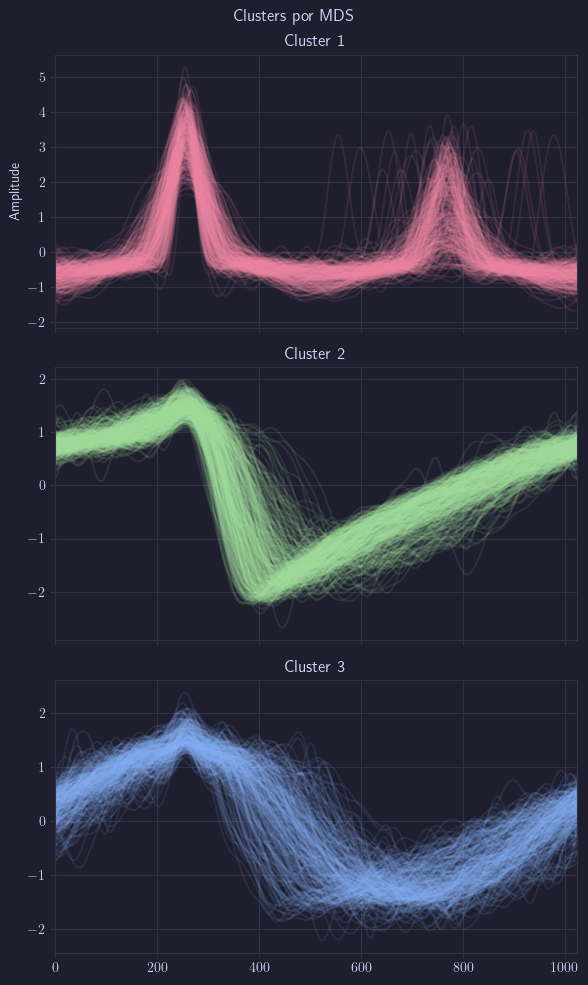

In [11]:
Figure, Subplot = plt.subplots(3, 1, sharex = "all", figsize=(6, 10))
Figure.suptitle("Clusters por MDS")

for class_data, time_series in zip(AssignedClusters, time_series):
    Subplot[class_data].plot(time_series, alpha = 0.1, color = group_colors[class_data + 1])
    Subplot[class_data].set_xlim(0, 1023)
    Subplot[class_data].grid(True)

Subplot[0].set_ylabel("Amplitude")
for k in range(1,4):
    Subplot[k-1].set_title(f"Cluster {k}")

Figure.tight_layout()

In [12]:
GetMetricsClustering(AssignedClusters, class_series, "MDS")

,Rand,NMI
MDS,0.766478,0.613218
